In [1]:
%matplotlib inline

In [2]:
import datetime
import requests as req
import psycopg2
import matplotlib.pyplot as plt

In [3]:
cities = { "Atlanta": '33.762909,-84.422675',
        "Austin": '30.303936,-97.754355',
        "Boston": '42.331960,-71.020173',
        "Chicago": '41.837551,-87.681844',
        "Cleveland": '41.478462,-81.679435'
    }

# Connect to an existing database
conn = psycopg2.connect("dbname=getting_started user=postgres password=Gatsby")

with conn:
#open the cursor
    cur = conn.cursor()

# set up the tables.
    cur.execute("DROP TABLE IF EXISTS weatherapi")

# CHANGED TO TEXT TYPE TO ELIMINATE INPUT ERRORS

    cur.execute("CREATE TABLE weatherapi (id serial, \
    entry_date text, \
    utime int, \
    city TEXT, \
    maxtemp float NOT NULL DEFAULT 0);")

# Connect to an existing database
conn = psycopg2.connect("dbname=getting_started user=postgres password=Gatsby")

with conn:
#open the cursor
    cur = conn.cursor()

# start_date = datetime.datetime.now() - datetime.timedelta(days=30)
    exec_time = datetime.datetime.now()
    # s =(timenow - datetime.datetime(1970,1,1)).total_seconds()
    sql = "insert into weatherapi (utime, entry_date, maxtemp, city) values(%s, %s, %s, %s)"

    for days in range(30):
        get_date = (exec_time - datetime.timedelta(days=days))
        s =(get_date - datetime.datetime(1970,1,1)).total_seconds()
        entry_date = get_date.strftime('%Y-%m-%d')
        
    #     print get_date
        for key in cities:
            lat = cities[key].split(',')[0]
            longi = cities[key].split(',')[1]
            s=int(s)
#             print days, key, lat, longi, s
            reqstring = "https://api.forecast.io/forecast/c99c5091c3a50bda392fb7850c54b4ef/" +str(lat) + ',' + str(longi) + ',' +str(s)
#             print reqstring

            r = req.get(reqstring)
    #         print r

            maxtemp = r.json()['daily']['data'][0]['apparentTemperatureMax']
#             print maxtemp

            cur.execute(sql , (s, entry_date, maxtemp, key))
        




In [4]:
import pandas as pd
# Connect to an existing database
conn = psycopg2.connect("dbname=getting_started user=postgres password=Gatsby")

with conn:
#open the cursor
    cur = conn.cursor()
    df = pd.read_sql_query("SELECT * FROM weatherapi ORDER BY entry_date, city",conn,index_col='entry_date')

In [5]:
df.head()

,id,utime,city,maxtemp
entry_date,,,,
2016-03-24,147,1458823336,Atlanta,73.41
2016-03-24,149,1458823336,Austin,69.30
2016-03-24,146,1458823336,Boston,40.30
2016-03-24,150,1458823336,Chicago,35.16
2016-03-24,148,1458823336,Cleveland,71.92


In [6]:
df['utime'].mean()

1460076136.0

In [7]:
df['maxtemp'].mean()

59.73513333333335

In [25]:
# get the mean for each city
for key in cities:
    print(key)
    maxtemp = df[df['city'] == key]['maxtemp'].max()
    mintemp = df[df['city'] == key]['maxtemp'].min()
    print("Mean {}".format(df[df['city'] == key]['maxtemp'].mean()))
    print("Min {}".format(df[df['city'] == key]['maxtemp'].min()))
    print("Max {}".format(df[df['city'] == key]['maxtemp'].max()))
    print("Var {}".format(df[df['city'] == key]['maxtemp'].var()))
    print("temperature difference {}".format(maxtemp - mintemp))
    
    
    print("**********************")
#     print(df[df['city'] == key]['maxtemp'].describe())

# range of temps for each city - below
# Boston is biggest temp swing at 53.21 degrees
    
    

Boston
Mean 48.6446666667
Min 18.83
Max 72.04
Var 163.227798161
temperature difference 53.21
**********************
Atlanta
Mean 69.9213333333
Min 59.51
Max 81.22
Var 32.6713567816
temperature difference 21.71
**********************
Cleveland
Mean 53.392
Min 25.36
Max 73.37
Var 217.605892414
temperature difference 48.01
**********************
Austin
Mean 76.031
Min 66.55
Max 88.79
Var 23.3660989655
temperature difference 22.24
**********************
Chicago
Mean 50.6866666667
Min 28.42
Max 74.41
Var 192.389354023
temperature difference 45.99
**********************


ValueError: invalid literal for float(): 2016-04-22

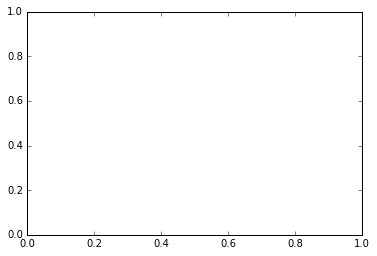

In [18]:
# use pyplot's factory functions...
fig, ax = plt.subplots()

# ax.set_title("Fico Score vs Interest Rate",fontsize=14)
# ax.set_xlabel("FICO score",fontsize=12)
# ax.set_ylabel("Interest rate",fontsize=12)

plt.plot(df.index.values, df['maxtemp'])

# plt.scatter(df[df['city']=='Chicago'],df['entry_date'], c='red')
               
# plt.xticks( site2['Cl'], site2.index.values ) # location, labels
# plt.plot( site2['Cl'] )
plt.show()

In [16]:
df.index

Index([u'2016-03-24', u'2016-03-24', u'2016-03-24', u'2016-03-24',
       u'2016-03-24', u'2016-03-25', u'2016-03-25', u'2016-03-25',
       u'2016-03-25', u'2016-03-25',
       ...
       u'2016-04-21', u'2016-04-21', u'2016-04-21', u'2016-04-21',
       u'2016-04-21', u'2016-04-22', u'2016-04-22', u'2016-04-22',
       u'2016-04-22', u'2016-04-22'],
      dtype='object', name=u'entry_date', length=150)

In [22]:
[type(item) for item in df.index.values]


[str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str]

In [19]:
df.info

<bound method DataFrame.info of              id       utime       city  maxtemp
entry_date                                     
2016-03-24  147  1458823336    Atlanta    73.41
2016-03-24  149  1458823336     Austin    69.30
2016-03-24  146  1458823336     Boston    40.30
2016-03-24  150  1458823336    Chicago    35.16
2016-03-24  148  1458823336  Cleveland    71.92
2016-03-25  142  1458909736    Atlanta    71.82
2016-03-25  144  1458909736     Austin    72.60
2016-03-25  141  1458909736     Boston    41.38
2016-03-25  145  1458909736    Chicago    35.71
2016-03-25  143  1458909736  Cleveland    50.91
2016-03-26  137  1458996136    Atlanta    64.65
2016-03-26  139  1458996136     Austin    72.83
2016-03-26  136  1458996136     Boston    39.27
2016-03-26  140  1458996136    Chicago    44.29
2016-03-26  138  1458996136  Cleveland    33.50
2016-03-27  132  1459082536    Atlanta    64.60
2016-03-27  134  1459082536     Austin    72.79
2016-03-27  131  1459082536     Boston    35.13
2016-03-